In [167]:
#Installed Modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [168]:
#Files

pyber_file = r'C:\Users\mattg\Desktop\Columbia\Module-5\CSV_Files\PyBer_ride_data.csv' #Change File Path 
ride_data = r'C:\Users\mattg\Desktop\Columbia\Module-5\CSV_Files\ride_data.csv' #Change File Path
city_data = r'C:\Users\mattg\Desktop\Columbia\Module-5\CSV_Files\city_data.csv' #Change File Path

#Data Frames
pyber_df = pd.read_csv(pyber_file)
ride_df = pd.read_csv(ride_data)
city_df = pd.read_csv(city_data)

#Merge Data Frames
new_df = ride_df.merge(city_df, how = 'left', on = 'city')
#print(new_df.head())

In [169]:
#Creating New Series
rider_count = new_df.groupby(['type']).count()['ride_id']
total_drivers = city_df.groupby(['type']).sum()['driver_count']
total_fare = new_df.groupby(['type']).sum()['fare']
average_fare_per_ride = total_fare / rider_count
average_fare_per_driver = total_fare / total_drivers

In [170]:
#Creating New Data Frame
df = pd.DataFrame({'Total Rides': rider_count,
                   'Total Drivers': total_drivers,
                  'Total Fares': total_fare,
                  'Average Fare Per Ride': average_fare_per_ride,
                  'Average Fare Per Driver': average_fare_per_driver })

#Remove the index name
df.index.name = None

#Formatting New Data Frame
df['Total Rides'] = df['Total Rides'].map("{:,}".format)
df['Total Drivers'] = df['Total Drivers'].map("{:,}".format)
df['Total Fares'] = df['Total Fares'].map("${:,.2f}".format)
df['Average Fare Per Ride'] = df['Average Fare Per Ride'].map("${:,.2f}".format)
df['Average Fare Per Driver'] = df['Average Fare Per Driver'].map("${:,.2f}".format)

#Display Data Frame
df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [171]:
#Pivoted Data
new_df = new_df.pivot_table('fare', ['date'], 'type')
new_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [172]:
#Changing Index To Datetime
df2 = new_df.loc['2019-01-01':'2019-04-28']
df2.index = pd.to_datetime(df2.index)

#Resampling
df2_month = df2.resample('W').sum()
df2_month

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


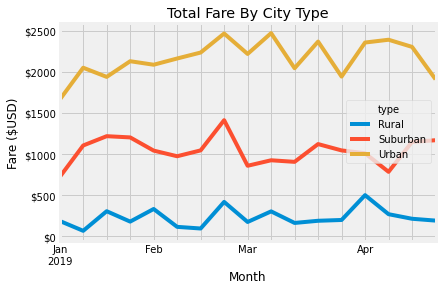

In [173]:
#Plotting
ax = df2_month.plot(xticks=df2_month.index, ylabel='type') 
plt.title('Total Fare By City Type')
plt.xlabel('Month')
plt.ylabel('Fare (\$USD)')
plt.style.use('fivethirtyeight')
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.savefig('PyBer_fare_summary.png')
plt.show()